In [1]:
import pandas as pd

In [2]:
df=pd.read_csv(r'C:\Users\user\Downloads\train.csv')

In [3]:
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [4]:
df.shape

(20800, 5)

In [5]:
df.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [6]:
df.dropna(inplace=True)

In [7]:
df.shape

(18285, 5)

In [8]:
import seaborn as sns
def create_distribution(feature):
    return sns.countplot(df[feature])

In [9]:
df.dtypes

id         int64
title     object
author    object
text      object
label      int64
dtype: object

In [10]:
df['label']=df['label'].astype(str)

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='count'>

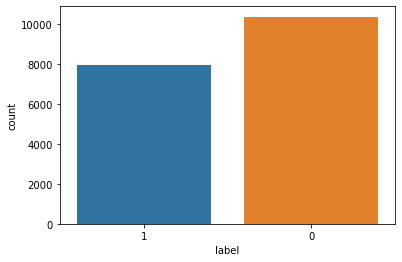

In [11]:
create_distribution('label')

In [12]:
message=df.copy()

In [13]:
message.reset_index(inplace=True)

In [14]:
message.drop(['index','id'],axis=1,inplace=True)

In [15]:
message.head()

,title,author,text,label
0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [16]:
##stemming
data=message['title'][0]

In [17]:
import re

In [18]:
re.sub('[^a-zA-Z]',' ',data)

'House Dem Aide  We Didn t Even See Comey s Letter Until Jason Chaffetz Tweeted It'

In [19]:
##USING NLP TO FIGURE OUT FAKE NEWS--NLP--BAG OR WORDS, TF-IDF--Vector representation
data=data.lower()
data

'house dem aide: we didn’t even see comey’s letter until jason chaffetz tweeted it'

In [20]:
list=data.split()

In [21]:
!pip install nltk

In [22]:
import nltk 
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords

In [23]:
ps=PorterStemmer()

In [24]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [25]:
review=[ps.stem(word) for word in list if word not in set(stopwords.words('english'))]

In [26]:
' '.join(review)

'hous dem aide: didn’t even see comey’ letter jason chaffetz tweet'

In [32]:
corpus=[]
sentences=[]
for i in range(0,len(message)):
    review=re.sub('[^a-zA-Z]',' ',message['title'][i])
    review=review.lower()
    list=review.split()
    review=[ps.stem(word) for word in list if word not in set(stopwords.words('english'))]
    sentences=' '.join(review)
    corpus.append(sentences)

In [33]:
corpus[0]

'hous dem aid even see comey letter jason chaffetz tweet'

In [34]:
corpus

['hous dem aid even see comey letter jason chaffetz tweet',
 'flynn hillari clinton big woman campu breitbart',
 'truth might get fire',
 'civilian kill singl us airstrik identifi',
 'iranian woman jail fiction unpublish stori woman stone death adulteri',
 'jacki mason hollywood would love trump bomb north korea lack tran bathroom exclus video breitbart',
 'beno hamon win french socialist parti presidenti nomin new york time',
 'back channel plan ukrain russia courtesi trump associ new york time',
 'obama organ action partner soro link indivis disrupt trump agenda',
 'bbc comedi sketch real housew isi caus outrag',
 'russian research discov secret nazi militari base treasur hunter arctic photo',
 'us offici see link trump russia',
 'ye paid govern troll social media blog forum websit',
 'major leagu soccer argentin find home success new york time',
 'well fargo chief abruptli step new york time',
 'anonym donor pay million releas everyon arrest dakota access pipelin',
 'fbi close hilla

In [35]:
##BAG OF WORDS
from sklearn.feature_extraction.text import CountVectorizer

In [36]:
cv=CountVectorizer(max_features=5000, ngram_range=(1,3))

In [37]:
x=cv.fit_transform(corpus).toarray()

In [38]:
x.shape

(18285, 5000)

In [43]:
cv.get_feature_names()[0:20]

['abandon',
 'abc',
 'abc news',
 'abduct',
 'abe',
 'abedin',
 'abl',
 'abort',
 'abroad',
 'absolut',
 'abstain',
 'absurd',
 'abus',
 'abus new',
 'abus new york',
 'academi',
 'accept',
 'access',
 'access pipelin',
 'access pipelin protest']

In [45]:
y=message['label']

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.5, random_state=42)

In [47]:
##Applying Naivew Bayes
from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB()

In [48]:
classifier.fit(X_train,y_train)

MultinomialNB()

In [50]:
predict=classifier.predict(X_test)

In [52]:
from sklearn import metrics
metrics.accuracy_score(y_test,predict)

0.8977359728754238

In [54]:
cm=metrics.confusion_matrix(y_test, predict)
cm

array([[4651,  530],
       [ 405, 3557]], dtype=int64)

In [58]:
import matplotlib.pyplot as plt
import numpy as np

In [61]:
def plot_confusion_matrix(cm):
    plt.imshow(cm, interpolation='nearest',cmap=plt.cm.Blues)
    plt.colorbar()
    plt.title('Confusion Matrix')
    labels=['position','negative']
    tick_marks=np.arange(len(labels))
    plt.xticks(tick_marks,labels)
    plt.yticks(tick_marks,labels)

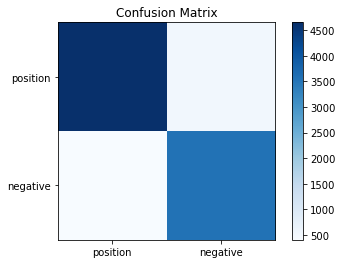

In [62]:
plot_confusion_matrix(cm)

In [63]:
from sklearn.linear_model import PassiveAggressiveClassifier

In [65]:
linear_clf=PassiveAggressiveClassifier()

In [66]:
linear_clf.fit(X_train, y_train)

PassiveAggressiveClassifier()

In [67]:
predictions=linear_clf.predict(X_test)

In [69]:
metrics.accuracy_score(y_test,predictions)

0.9166575522257465

In [71]:
cm2=metrics.confusion_matrix(y_test,predictions)

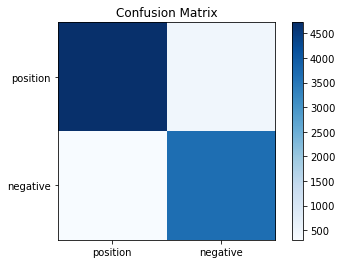

In [72]:
plot_confusion_matrix(cm2)

In [74]:
feature_names=cv.get_feature_names()

In [75]:
classifier.coef_

array([[ -8.84687097,  -8.66454941,  -9.07001452, ..., -10.45630888,
         -8.84687097,  -9.35769659]])

In [78]:
sorted(zip(classifier.coef_[0],feature_names),reverse=True)[0:20]

[(-4.007419487607279, 'trump'),
 (-4.312123247628491, 'hillari'),
 (-4.430442907928822, 'clinton'),
 (-4.895627250738609, 'elect'),
 (-5.246822728912715, 'comment'),
 (-5.2801591491803075, 'new'),
 (-5.393713848727169, 'war'),
 (-5.393713848727169, 'video'),
 (-5.406452874504599, 'us'),
 (-5.43242836090786, 'hillari clinton'),
 (-5.445673587657881, 'fbi'),
 (-5.4727022600458, 'obama'),
 (-5.5004818241528755, 'email'),
 (-5.5146664591448324, 'vote'),
 (-5.6688171389720905, 'world'),
 (-5.8215798935245004, 'donald'),
 (-5.831336068469866, 'donald trump'),
 (-5.8611890316195465, 'russia'),
 (-5.8815979032507535, 'presid'),
 (-5.9024319901535955, 'america')]